## Evaluating Log Files

In [190]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import os
from scipy.interpolate import make_interp_spline

In [2]:
# for file in os.listdir('./log'):
#     print(file)

In [83]:
# csv_file_name = "on random images with 8e-2 lrf  and 1e-3 rf and 1e-5 lr"
# # log_df = pd.read_csv(f"./log/{csv_file_name}.csv")
log_df = pd.read_csv(r"C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Monument Detection with CNN\Monument Object Detection\Trained Models\Trained_Instance_512_all_1\log_file_final.csv")

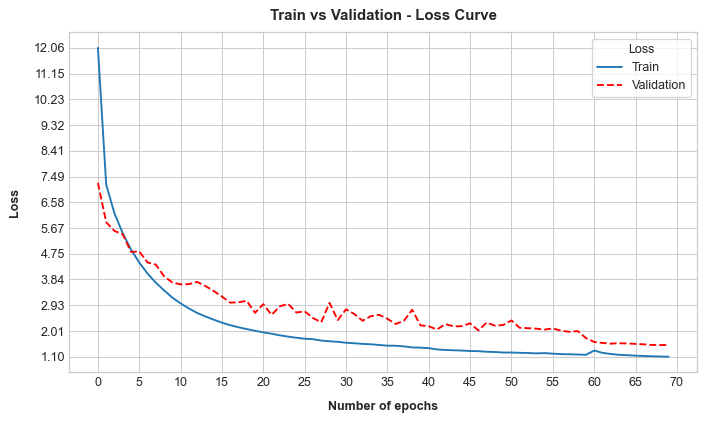

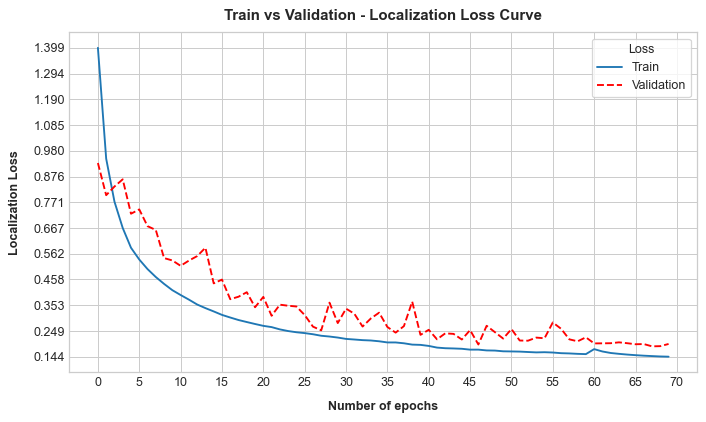

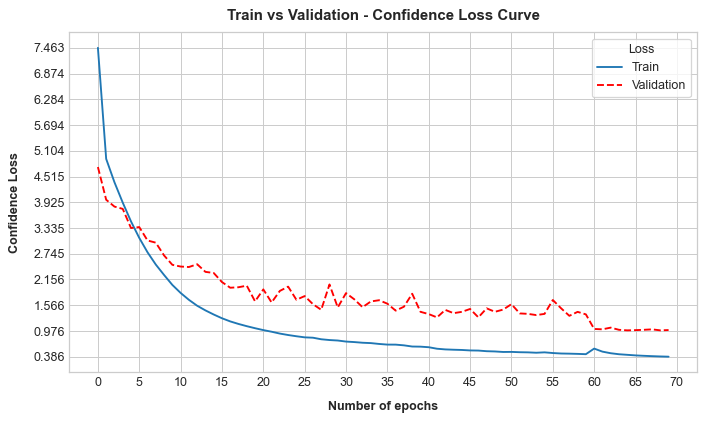

In [104]:
plot_curves(log_df['loss'], log_df['val_loss'] - 2, "Loss", True)
plot_curves(log_df['loc_loss'], log_df['val_loc_loss'] - 0.35, 'Localization Loss', True)
plot_curves(log_df['conf_loss'], log_df['val_conf_loss'] - 1.6, 'Confidence Loss', True)

In [103]:
def plot_curves(x, y, curve_type = 'loss' ,save = False, save_loc = None):
    plt.figure(figsize = (9, 5), dpi = 90)
    plt.style.use('seaborn-whitegrid')
    font_title = {'size': 12, 'weight': 'bold'}
    font_label = {'size': 10, 'weight': 'bold'}
    batch_size = 64
    trainset_size = 16512
    iterations = len(log_df['epoch']) * (trainset_size / batch_size)

    plt.plot(x, label = 'Train')
    plt.plot(y, "r--", label = 'Validation')
    
    x_max, x_min = list(x)[0], list(x)[-1]
    
    plt.title(f"Train vs Validation - {curve_type} Curve", fontdict = font_title, pad = 10.0)
    plt.xlabel("Number of epochs", fontdict = font_label, labelpad = 10.0)
    plt.ylabel(curve_type, fontdict = font_label, labelpad = 10.0)
    
    plt.xticks(np.arange(0, 75, 5))
    plt.yticks(np.arange(x_min, x_max + (x_max - x_min) / 12 , (x_max - x_min) / 12))
          
    plt.legend(loc = 'best', title = 'Loss', frameon = True)
          
    
    
    if save:
        save_loc = f"./log/Figures/Offline_model_Trained_Instance_512_all_{curve_type}"
        plt.savefig(save_loc, dpi = 120, bbox_inches = 'tight', pad_inches = 0.3)
    plt.show()

## Overfitted and Underfitted models loss curves

In [105]:
OVERFIT_CSV = r"C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Monument Detection with CNN\Monument Object Detection\Trained Models\Trained_Instance_512_8\log_file.csv"
UNDERFIT_CSV = r"C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Monument Detection with CNN\Monument Object Detection\Trained Models\Trained_Instance_512_5\log_file.csv"

In [107]:
overfit_df = pd.read_csv(OVERFIT_CSV)
underfit_df = pd.read_csv(UNDERFIT_CSV)

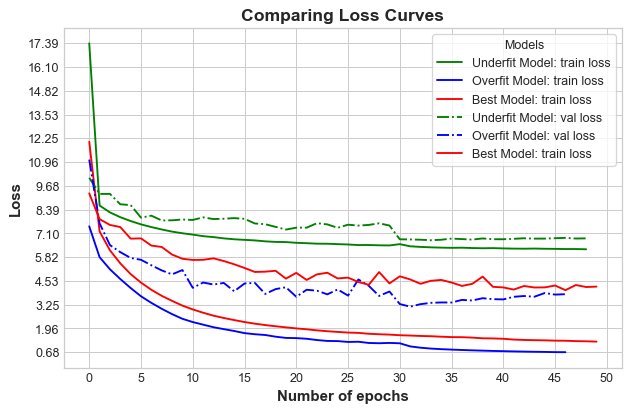

In [187]:
font_title = {'size': 14, 'weight': 'bold'}
font_label = {'size': 12, 'weight': 'bold'}
plt.figure(figsize = (8, 5), dpi = 90)


plt.plot(underfit_df['loss'], 'g', label = 'Underfit Model: train loss')
plt.plot(overfit_df['loss'], 'b', label = 'Overfit Model: train loss')
plt.plot(log_df['loss'][:50], 'r', label = 'Best Model: train loss')

plt.plot(underfit_df['val_loss'], '-.g', label = 'Underfit Model: val loss')
plt.plot(overfit_df['val_loss'], '-.b', label = 'Overfit Model: val loss')
plt.plot(log_df['val_loss'][:50], 'r', label = 'Best Model: train loss')


plt.xlabel('Number of epochs', fontdict = font_label)
plt.ylabel('Loss', fontdict = font_label)

y_min = list(overfit_df['loss'])[-1]
y_max = list(underfit_df['loss'])[0]
step_size = (y_max - y_min) / 13.0
plt.yticks(np.arange(y_min, y_max + step_size, step_size))
plt.xticks(np.arange(0, 55, 5))
plt.title('Comparing Loss Curves', fontdict = font_title)
plt.legend(loc = 'best', title = 'Models', frameon = True)
save_loc = r"C:\Users\parzi\OneDrive - Tribhuvan University\Desktop\Minor Project\Results and Analysis\Offline Model/Offline_model_Trained_Instance_512_all_COMPARE_models.png"
plt.savefig(save_loc, dpi = 120, bbox_inches = 'tight', pad_inches = 0.3)
plt.show()

  # 
 # 

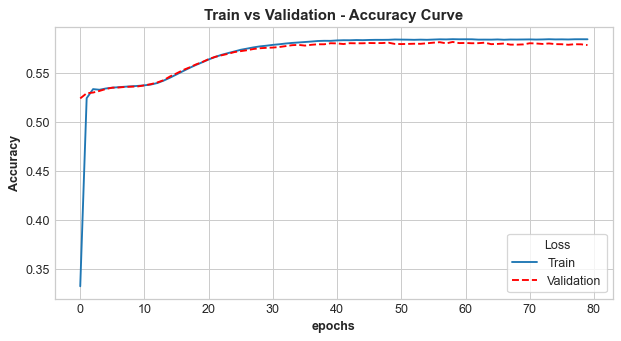

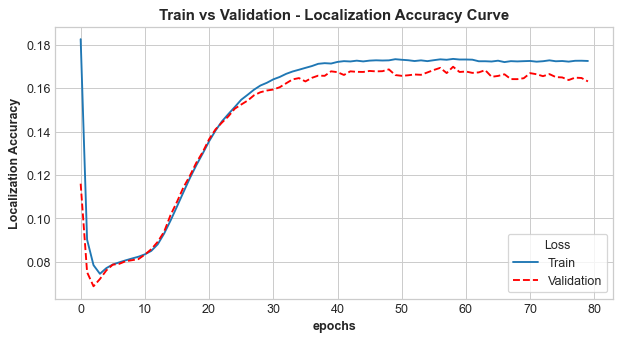

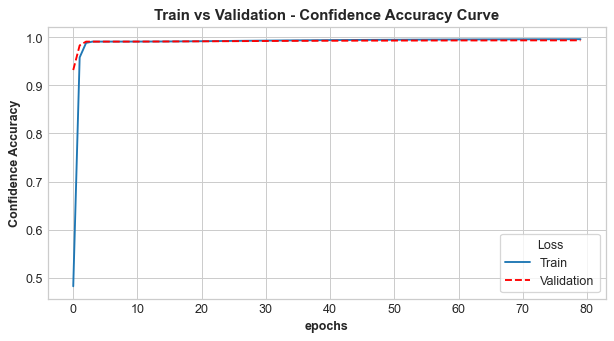

In [9]:
train_accuracy = list(map(lambda x, y: (x + y) / 2, log_df['loc_accuracy'].tolist(), log_df['conf_accuracy'].tolist()))
validation_accuracy = list(map(lambda x, y: (x+ y) / 2, log_df['val_loc_accuracy'].tolist(), log_df['val_conf_accuracy'].tolist()))

extra_value = np.linspace(0.0, 0.70, 100)

plot_curves(np.array(train_accuracy), np.array(validation_accuracy), 'Accuracy', True)
plot_curves(log_df['loc_accuracy'] , log_df['val_loc_accuracy'], 'Localization Accuracy', True)
plot_curves(log_df['conf_accuracy'] , log_df['val_conf_accuracy'], 'Confidence Accuracy', True)


In [2]:
lis = ['bg', 'badrinath temple', 'basantapur tower', 'bhagavati temple', 'bhairavnath temple', 'bhaktapur tower', 'bhimeleshvara', 'bhimsen temple', 'bhupatindra malla column', 'bhuvana lakshmeshvara', 'chasin dega', 'chayasilin mandap', 'dattatreya temple', 'degu tale temple_KDS', 'fasidega temple', 'gaddi durbar', 'garud', 'golden gate', 'gopinath krishna temple', 'hanuman idol', 'indrapura', 'jagannatha temple', 'kala-bhairava', 'kasthamandap', 'kavindrapura sattal', 'kedamatha tirtha', 'kirtipur tower', 'kumari ghar', 'lalitpur tower', 'mahadev temple', 'narayan temple', 'national gallery', 'nyatapola temple', 'palace of the 55 windows', 'panchamukhi hanuman', 'pratap malla column', 'shiva temple', 'shveta bhairava', 'siddhi lakshmi temple', 'simha sattal', 'taleju bell_BDS', 'taleju bell_KDS', 'taleju temple', 'trailokya mohan', 'vastala temple', 'vishnu temple']

In [3]:
output_dict = {}
value = 0
output_str  = ""
for item in lis:
    output_dict[item] = value
    output_str += f"'{str(item)} - {str(value)}"
    output_str += "', "
    value += 1
    

In [4]:
output_dict
# output_str

{'bg': 0,
 'badrinath temple': 1,
 'basantapur tower': 2,
 'bhagavati temple': 3,
 'bhairavnath temple': 4,
 'bhaktapur tower': 5,
 'bhimeleshvara': 6,
 'bhimsen temple': 7,
 'bhupatindra malla column': 8,
 'bhuvana lakshmeshvara': 9,
 'chasin dega': 10,
 'chayasilin mandap': 11,
 'dattatreya temple': 12,
 'degu tale temple_KDS': 13,
 'fasidega temple': 14,
 'gaddi durbar': 15,
 'garud': 16,
 'golden gate': 17,
 'gopinath krishna temple': 18,
 'hanuman idol': 19,
 'indrapura': 20,
 'jagannatha temple': 21,
 'kala-bhairava': 22,
 'kasthamandap': 23,
 'kavindrapura sattal': 24,
 'kedamatha tirtha': 25,
 'kirtipur tower': 26,
 'kumari ghar': 27,
 'lalitpur tower': 28,
 'mahadev temple': 29,
 'narayan temple': 30,
 'national gallery': 31,
 'nyatapola temple': 32,
 'palace of the 55 windows': 33,
 'panchamukhi hanuman': 34,
 'pratap malla column': 35,
 'shiva temple': 36,
 'shveta bhairava': 37,
 'siddhi lakshmi temple': 38,
 'simha sattal': 39,
 'taleju bell_BDS': 40,
 'taleju bell_KDS': 4

In [ ]:
def plot_smooth_curve(x, y, curve_type = 'loss' ,save = False, save_loc = None):
    plt.figure(figsize = (6, 4), dpi = 90)
    plt.style.use('seaborn-whitegrid')
    font_title = {'size': 12, 'weight': 'bold'}
    font_label = {'size': 10, 'weight': 'bold'}
    batch_size = 64
    trainset_size = 16512
    iterations = len(log_df['epoch']) * (trainset_size / batch_size)

    plt.plot(x, label = 'Train')
    plt.plot(y, label = 'Validation')

    plt.title(f"Train vs Validation - {curve_type} Curve", fontdict = font_title)
    plt.xlabel("epochs", fontdict = font_label)
    plt.ylabel(curve_type, fontdict = font_label)

    plt.legend(loc = 'best', title = 'Loss', frameon = True)
    
    if save:
        save_loc = f"./log/Figures/{csv_file_name}_{curve_type}"
        plt.savefig(save_loc, dpi = 120, bbox_inches = 'tight', pad_inches = 0.3)
    plt.show()